# Mini Project 1

## Introduction
    In this project, Mnist dataset was used for feature extraction and classification. Training data with 60000 handwrite digits images was used in the feature extraction part. For pre-trained deep learning network, the images were reshaped to (224,224,3) to fit the default input size. The three chanels were transformed from the duplicate of the original grey images.

    In features visualization part, features from scaterring net and pre-trained models were firstly processed with PCA to 30 components, then TSNE was used for visualization.

## Import

In [31]:
import warnings
warnings.filterwarnings("ignore")
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from kymatio.numpy import Scattering2D
import sklearn as sk
import pandas as pd
import seaborn as sns
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import GaussianRandomProjection
from sklearn.decomposition import FastICA
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.random_projection import SparseRandomProjection
from keras import models, Input
from keras import applications
from keras.applications.vgg16 import preprocess_input as vgg16_input
from keras.applications.vgg19 import preprocess_input as vgg19_input
from keras.preprocessing import image
from PIL import Image
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

## Load data and basic settings

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
train_images = train_images / 255.0
test_images = test_images / 255.0

## Visualization of image examples

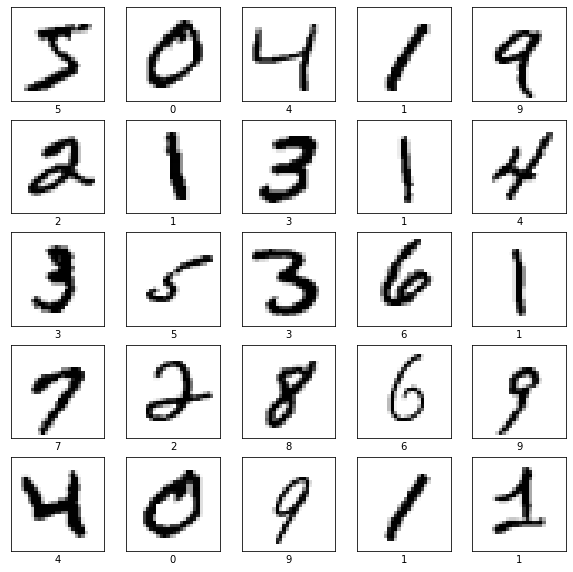

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Feature extraction and visualization

In this section, we used Mnist training data for feature extraction experiment. Scatterring net, pre-trained VGG16 and VGG19 were applyed for feature extraction and T-SNE was used for visualization.

In [4]:
pca_30=PCA(n_components=30)
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)

## Origin image

In [6]:
features = train_images.reshape((train_images.shape[0], -1))
origin_pca=pca_30.fit_transform(features)
tsne_pca_origin = tsne.fit_transform(origin_pca)

## Scattering net

In [7]:
scattering = Scattering2D(J=2, shape=(28, 28))
features = scattering(train_images)
features = features.reshape((features.shape[0], -1))
scatter_pca=pca_30.fit_transform(features)
tsne_pca_scatter = tsne.fit_transform(scatter_pca)

## VGG16

In [8]:
base_model = applications.VGG16(weights='imagenet', include_top=False)
featurelist = []
for i in range(train_images.shape[0]):
    
    img = Image.fromarray(train_images[i]*255).convert('RGB')
    resize_img = img.resize((224,224),Image.ANTIALIAS)

    x = image.img_to_array(resize_img)
    x = np.expand_dims(x, axis=0)
    x = vgg16_input(x)

    features = base_model.predict(x)
    featurelist.append(features.reshape((features.shape[0], -1)))
features = np.squeeze(np.asarray(featurelist), axis=1)
VGG16_pca=pca_30.fit_transform(features)
tsne_pca_VGG16 = tsne.fit_transform(VGG16_pca)

## VGG19

In [33]:
base_model = applications.VGG19(weights='imagenet', include_top=False)
featurelist = []
for i in range(train_images.shape[0]):
    
    img = Image.fromarray(train_images[i]*255).convert('RGB')
    resize_img = img.resize((224,224),Image.ANTIALIAS)

    x = image.img_to_array(resize_img)
    x = np.expand_dims(x, axis=0)
    x = vgg19_input(x)

    features = base_model.predict(x)
    featurelist.append(features.reshape((features.shape[0], -1)))
features = np.squeeze(np.asarray(featurelist), axis=1)
VGG19_pca=pca_30.fit_transform(features)
tsne_pca_VGG19 = tsne.fit_transform(VGG19_pca)

## Feature summary

| Method    | Feature   |
|-----------|-----------|
|   Origin  |     784   |
|Scattering |    3969   |
|   VGG16   |   25088   |
|   VGG19   |   25088   |

Text(0.5, 1.0, 'VGG19')

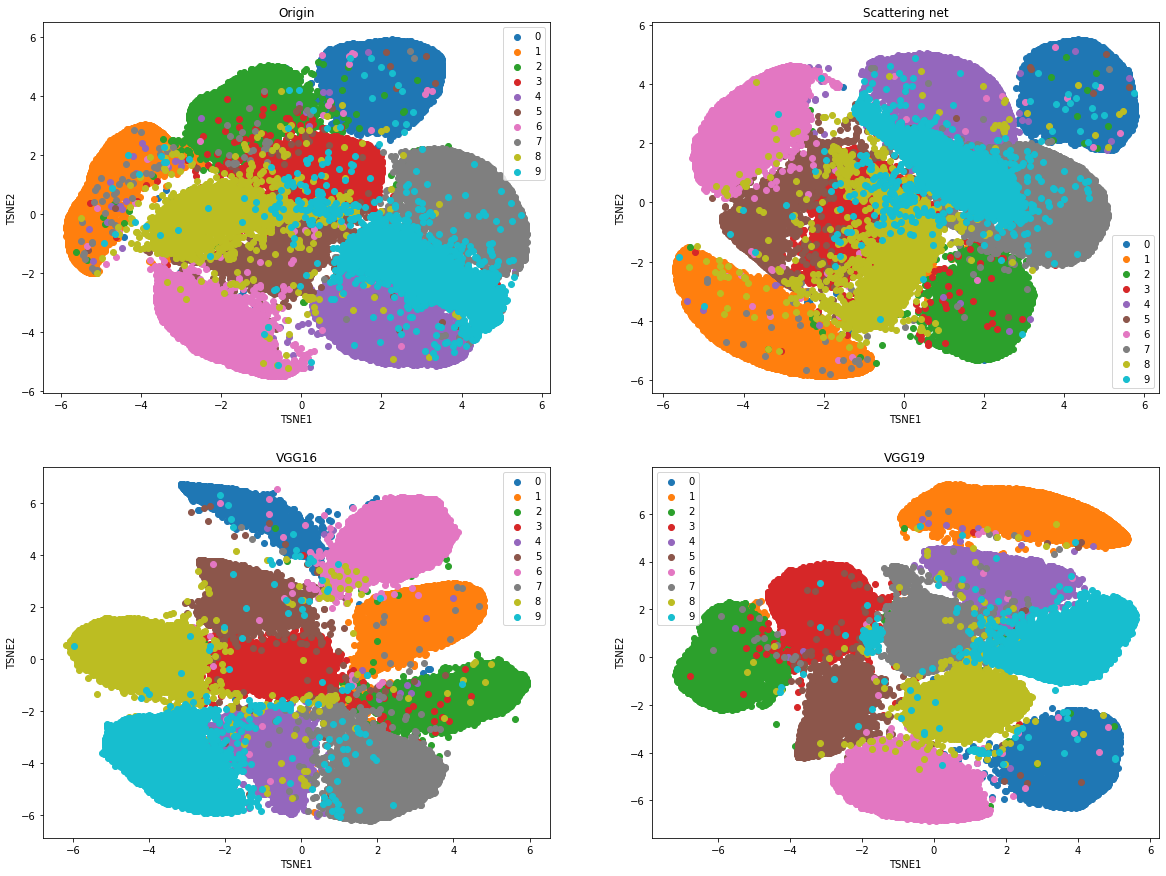

In [18]:
names=np.unique(class_names)
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

for i, label in zip(range(10), names):
    axes[0][0].scatter(tsne_pca_origin[train_labels == i, 0], tsne_pca_origin[train_labels == i, 1], label=label)
axes[0][0].legend()
axes[0][0].set_xlabel('TSNE1')
axes[0][0].set_ylabel('TSNE2')
axes[0][0].set_title('Origin')

for i, label in zip(range(10), names):
    axes[0][1].scatter(tsne_pca_scatter[train_labels == i, 0], tsne_pca_scatter[train_labels == i, 1], label=label)
axes[0][1].legend()
axes[0][1].set_xlabel('TSNE1')
axes[0][1].set_ylabel('TSNE2')
axes[0][1].set_title('Scattering net')

for i, label in zip(range(10), names):
    axes[1][0].scatter(tsne_pca_VGG16[train_labels == i, 0], tsne_pca_VGG16[train_labels == i, 1], label=label)
axes[1][0].legend()
axes[1][0].set_xlabel('TSNE1')
axes[1][0].set_ylabel('TSNE2')
axes[1][0].set_title('VGG16')

for i, label in zip(range(10), names):
    axes[1][1].scatter(tsne_pca_VGG19[train_labels == i, 0], tsne_pca_VGG19[train_labels == i, 1], label=label)
axes[1][1].legend()
axes[1][1].set_xlabel('TSNE1')
axes[1][1].set_ylabel('TSNE2')
axes[1][1].set_title('VGG19')

## Visualization results
The TSNE visualization shows that the VGG16 and VGG19 got good separation of 10 classes images. However the features extracted by scattering net shows no improvement with the origin pixel values. It implies that VGG networks could extract better features than scatter net. The reason of this phenomenon might be the parameters of scatter net were not optimized as I didn't try many different parameters. Another reason might be that the kernels in VGG networks that pre-trained in large dataset of Imagenet improve the ability of feature extraction.

## Classification machine learning model
### VGG19 features

In [34]:
from pycaret.classification import *
VGG19_df = pd.DataFrame(features,columns=[ 'feature'+str(i) for i in range(features.shape[1]) ])
VGG19_df['label'] = train_labels

In [35]:
exp_VGG19 = setup(data = VGG19_df, target = 'label', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(60000, 25089)"
4,Missing Values,False
5,Numeric Features,25088
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
VGG19_best_model = compare_models()

In [36]:
## Extra Trees Classifier
VGG_et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9817,0.0000,0.9817,0.9817,0.9817,0.9796,0.9796
1,0.9833,0.0000,0.9835,0.9835,0.9834,0.9815,0.9815
2,0.9852,0.0000,0.9852,0.9852,0.9852,0.9836,0.9836
3,0.9802,0.0000,0.9802,0.9803,0.9802,0.9780,0.9780
4,0.9821,0.0000,0.9821,0.9823,0.9821,0.9802,0.9802
5,0.9838,0.0000,0.9837,0.9839,0.9838,0.9820,0.9820
6,0.9800,0.0000,0.9798,0.9801,0.9800,0.9778,0.9778
7,0.9812,0.0000,0.9810,0.9812,0.9812,0.9791,0.9791
8,0.9833,0.0000,0.9832,0.9835,0.9833,0.9815,0.9815
9,0.9795,0.0000,0.9793,0.9797,0.9795,0.9772,0.9773


In [37]:
## Test on hold-out dataset
predict_model(VGG_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9837,0,0.9836,0.9837,0.9837,0.9818,0.9819


,feature44,feature47,feature88,feature89,feature113,feature131,feature138,feature163,feature172,feature180,...,feature25016,feature25017,feature25056,feature25059,feature25075,feature25078,feature25082,label,Label,Score
0,3.633643,0.085422,1.157065,6.179511,0.118792,0.000000,0.000000,0.000000,0.000000,0.0,...,3.185465,0.000000,0.570290,3.958119,2.536954,5.534993,0.000000,0,0,0.96
1,4.061316,0.534283,1.603555,5.693766,0.000000,1.261403,0.000000,0.000000,0.000000,0.0,...,2.435244,4.927863,0.000000,0.642524,0.000000,5.812096,0.000000,8,8,0.60
2,3.713976,0.000000,1.566810,7.777047,1.230055,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2.017070,3.995215,3.952312,0.000000,0,0,0.90
3,2.740850,4.317382,3.539175,3.007722,0.000000,1.030383,5.458830,0.000000,0.000000,0.0,...,1.099422,3.389369,0.000000,0.000000,0.000000,7.383317,0.000000,5,5,0.65
4,4.512117,0.000000,1.282334,8.510433,1.011943,0.000000,0.000000,0.000000,0.132917,0.0,...,1.197255,0.000000,0.000000,4.288196,1.157262,4.582409,0.000000,6,6,0.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,3.997325,0.638213,1.262903,7.510463,0.669242,0.000000,0.000000,0.000000,0.000000,0.0,...,2.168885,0.000000,2.000749,2.595295,3.605728,6.321924,0.504932,0,0,0.94
17997,3.237963,0.000000,2.715642,2.507065,0.000000,2.049564,9.644368,0.000000,0.000000,0.0,...,2.258875,0.000000,0.000000,4.246129,0.909659,5.679597,0.000000,2,2,0.71
17998,3.455161,0.000000,1.624275,8.479486,1.264276,0.000000,0.000000,0.184561,0.000000,0.0,...,3.147327,0.000000,0.000000,4.836227,3.063824,5.166205,0.000000,6,6,0.98
17999,3.313434,0.000000,1.438998,8.802566,1.516182,0.000000,0.000000,0.288794,0.000000,0.0,...,3.205797,1.091314,0.000000,6.935885,0.538741,4.040228,0.000000,8,8,0.90


In [38]:
## Random Forest Classifier
VGG_rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.0000,0.9596,0.9603,0.9600,0.9555,0.9556
1,0.9607,0.0000,0.9605,0.9611,0.9607,0.9563,0.9564
2,0.9648,0.0000,0.9644,0.9650,0.9648,0.9608,0.9609
3,0.9595,0.0000,0.9594,0.9598,0.9595,0.9550,0.9550
4,0.9593,0.0000,0.9590,0.9597,0.9592,0.9547,0.9548
5,0.9636,0.0000,0.9632,0.9640,0.9636,0.9595,0.9596
6,0.9590,0.0000,0.9584,0.9596,0.9590,0.9545,0.9545
7,0.9538,0.0000,0.9532,0.9543,0.9538,0.9487,0.9487
8,0.9619,0.0000,0.9616,0.9620,0.9618,0.9577,0.9577
9,0.9576,0.0000,0.9569,0.9578,0.9575,0.9529,0.9529


In [40]:
## Test on hold-out dataset
predict_model(VGG_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9634,0,0.9631,0.9637,0.9634,0.9594,0.9594


,feature44,feature47,feature88,feature89,feature113,feature131,feature138,feature163,feature172,feature180,...,feature25016,feature25017,feature25056,feature25059,feature25075,feature25078,feature25082,label,Label,Score
0,3.633643,0.085422,1.157065,6.179511,0.118792,0.000000,0.000000,0.000000,0.000000,0.0,...,3.185465,0.000000,0.570290,3.958119,2.536954,5.534993,0.000000,0,0,1.0
1,4.061316,0.534283,1.603555,5.693766,0.000000,1.261403,0.000000,0.000000,0.000000,0.0,...,2.435244,4.927863,0.000000,0.642524,0.000000,5.812096,0.000000,8,8,0.5
2,3.713976,0.000000,1.566810,7.777047,1.230055,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2.017070,3.995215,3.952312,0.000000,0,0,0.9
3,2.740850,4.317382,3.539175,3.007722,0.000000,1.030383,5.458830,0.000000,0.000000,0.0,...,1.099422,3.389369,0.000000,0.000000,0.000000,7.383317,0.000000,5,5,0.8
4,4.512117,0.000000,1.282334,8.510433,1.011943,0.000000,0.000000,0.000000,0.132917,0.0,...,1.197255,0.000000,0.000000,4.288196,1.157262,4.582409,0.000000,6,6,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17996,3.997325,0.638213,1.262903,7.510463,0.669242,0.000000,0.000000,0.000000,0.000000,0.0,...,2.168885,0.000000,2.000749,2.595295,3.605728,6.321924,0.504932,0,0,1.0
17997,3.237963,0.000000,2.715642,2.507065,0.000000,2.049564,9.644368,0.000000,0.000000,0.0,...,2.258875,0.000000,0.000000,4.246129,0.909659,5.679597,0.000000,2,2,0.7
17998,3.455161,0.000000,1.624275,8.479486,1.264276,0.000000,0.000000,0.184561,0.000000,0.0,...,3.147327,0.000000,0.000000,4.836227,3.063824,5.166205,0.000000,6,6,1.0
17999,3.313434,0.000000,1.438998,8.802566,1.516182,0.000000,0.000000,0.288794,0.000000,0.0,...,3.205797,1.091314,0.000000,6.935885,0.538741,4.040228,0.000000,8,8,0.9


In [ ]:
## CatBoost Classifier
VGG_catboost = create_model('catboost')

In [ ]:
## Test on hold-out dataset
predict_model(VGG_catboost)

### Scattering features

In [ ]:
features = scattering(train_images)
features = features.reshape((features.shape[0], -1))
Scatter_df = pd.DataFrame(features,columns=[ 'feature'+str(i) for i in range(features.shape[1]) ])
Scatter_df['label'] = train_labels
exp_Scatter = setup(data = Scatter_df, target = 'label', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True) 

In [ ]:
Scatter_best_model = compare_models()

In [ ]:
## Extra Trees Classifier
Scatter_et = create_model('et')

In [ ]:
## Test on hold-out dataset
predict_model(Scatter_et)

In [ ]:
## Random Forest Classifier
Scatter_rf = create_model('rf')

In [ ]:
## Test on hold-out dataset
predict_model(Scatter_rf)

In [ ]:
## CatBoost Classifier
Scatter_catboost = create_model('catboost')

In [ ]:
## Test on hold-out dataset
predict_model(Scatter_catboost)

### Origin pixel values

In [26]:
features = train_images.reshape((train_images.shape[0], -1))
origin_df = pd.DataFrame(features,columns=[ 'pixel'+str(i) for i in range(features.shape[1]) ])
origin_df['label'] = train_labels
exp_origin = setup(data = origin_df, target = 'label', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(60000, 785)"
4,Missing Values,False
5,Numeric Features,767
6,Categorical Features,17
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
origin_best_model = compare_models()

In [27]:
## Extra Trees Classifier
origin_et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9679,0.0000,0.9677,0.9679,0.9678,0.9643,0.9643
1,0.9667,0.0000,0.9667,0.9670,0.9667,0.9630,0.9630
2,0.9686,0.0000,0.9684,0.9686,0.9686,0.9651,0.9651
3,0.9643,0.0000,0.9641,0.9645,0.9643,0.9603,0.9603
4,0.9695,0.0000,0.9693,0.9696,0.9695,0.9661,0.9661
5,0.9702,0.0000,0.9701,0.9703,0.9702,0.9669,0.9669
6,0.9669,0.0000,0.9666,0.9670,0.9669,0.9632,0.9632
7,0.9626,0.0000,0.9621,0.9627,0.9626,0.9585,0.9585
8,0.9681,0.0000,0.9677,0.9681,0.9680,0.9645,0.9645
9,0.9640,0.0000,0.9635,0.9640,0.9640,0.9600,0.9600


In [29]:
## Test on hold-out dataset
pred_holdout = predict_model(origin_et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9684,0,0.9683,0.9684,0.9684,0.9649,0.9649


In [ ]:
## Random Forest Classifier
origin_rf = create_model('rf')

In [ ]:
## Test on hold-out dataset
pred_holdout = predict_model(origin_rf)

In [ ]:
## CatBoost Classifier
origin_catboost = create_model('catboost')

In [ ]:
## Test on hold-out dataset
pred_holdout = predict_model(origin_catboost)

## Models summary

|          Method        |  Feature  | 10-floder Accuracy | Hold-out Accuracy|
|------------------------|-----------|--------------------|------------------|
|Extra Trees Classifier  |  Origin   |        0.9669      |       0.9684     |
|Extra Trees Classifier  |Scattering |        0.9801      |       0.9812     |
|Extra Trees Classifier  |   VGG19   |        0.9820      |       0.9837     |
|Random Forest Classifier|  Origin   |        0.9374      |       0.9398     |
|Random Forest Classifier|Scattering |        0.9636      |       0.9629     |
|Random Forest Classifier|   VGG19   |        0.9600      |       0.9634     |
|  CatBoost Classifier   |  Origin   |        0.9751      |       0.9776     |
|  CatBoost Classifier   |Scattering |        0.9857      |       0.9863     |
|  CatBoost Classifier   |   VGG19   |        0.9921      |       0.9932     |

## Classification result
In this part, origin pixel values, features extracted by scttering net and pre-trained deep learning networks were used to train classification models. A package named pycaret was used here which could help to train different machine learning models with different parameter combination to get best model for the given dataset. 10-folder cross-validation accuracy was used to evaluate the performance of different models in different features dataset. The origin pixel values got the mean accuracy of 97.51% by CatBoost Classifier, scattering net features got 98.57% by CatBoost Classifier, and VGG19 features got 99.21% by CatBoost Classifier which was the best in all features and models. It was consistant with the visualization results upside that VGG networks was better for feature extraction. Here I also compared the performance of Extra Trees Classifier and Random Forest Classifier. Then, all the models were tested on hold-out dataset, the result was consistant with 10-folder cross-validation result.

## Annotation
Because of the size of features, it costs quite a long time to run CatBoost Classifier in Scattering net features and VGG network features. The results in models summary were from several jupyter notebooks and I didn't run it again in this one.